In [1]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
file_path = "diabetes.csv"  # Adjust path if needed
df = pd.read_csv(file_path)

# Show first 5 rows of the dataset
print("🔹 Preview of the dataset:")
display(df.head())

# Check general info about the dataset
print("\n🔹 Dataset Info:")
df.info()

# Display basic statistics
print("\n🔹 Descriptive Statistics:")
display(df.describe())

🔹 Preview of the dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

🔹 Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [2]:
import numpy as np

# List of columns where 0 should be replaced with NaN
columns_to_fix = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Replace 0 with NaN in the specified columns
df[columns_to_fix] = df[columns_to_fix].replace(0, np.nan)

# Check how many NaNs we have now
df[columns_to_fix].isnull().sum()

Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
dtype: int64

In [3]:
# Impute missing values with median for each column
df[columns_to_fix] = df[columns_to_fix].fillna(df[columns_to_fix].median())

# Check again
df[columns_to_fix].isnull().sum()

Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
dtype: int64

In [4]:
# Create AgeGroup feature
def categorize_age(age):
    if age < 30:
        return 'Young'
    elif age < 50:
        return 'Middle'
    else:
        return 'Old'

df['AgeGroup'] = df['Age'].apply(categorize_age)

# Create BMICategory feature based on WHO classification
def categorize_bmi(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df['BMICategory'] = df['BMI'].apply(categorize_bmi)

# Check new features
df[['Age', 'AgeGroup', 'BMI', 'BMICategory']].head()

,Age,AgeGroup,BMI,BMICategory
0,50,Old,33.6,Obese
1,31,Middle,26.6,Overweight
2,32,Middle,23.3,Normal
3,21,Young,28.1,Overweight
4,33,Middle,43.1,Obese


In [5]:
# Create a new interaction feature
df['Glucose_BMI'] = df['Glucose'] * df['BMI']
from sklearn.preprocessing import StandardScaler

# Select numeric features to scale (exclude Outcome and categorical)
numerical_features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 
                      'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Glucose_BMI']

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Check result
df[numerical_features].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Glucose_BMI
0,0.639947,0.866045,-0.031990,0.670643,-0.181541,0.166619,0.468492,1.425995,0.664622
1,-0.844885,-1.205066,-0.528319,-0.012301,-0.181541,-0.852200,-0.365061,-0.190672,-1.181768
2,1.233880,2.016662,-0.693761,-0.012301,-0.181541,-1.332500,0.604397,-0.105584,0.181952
3,-0.844885,-1.073567,-0.528319,-0.695245,-0.540642,-0.633881,-0.920763,-1.041549,-1.018427
4,-1.141852,0.504422,-2.679076,0.670643,0.316566,1.549303,5.484909,-0.020496,1.299127


In [6]:
from sklearn.model_selection import train_test_split

# Drop the target column from X
X = df.drop(columns=['Outcome'])

# One-hot encode AgeGroup and BMICategory
X = pd.get_dummies(X, columns=['AgeGroup', 'BMICategory'], drop_first=True)

# Set y as the target column
y = df['Outcome']

# Perform train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Check shape of splits
print("Train set size:", X_train.shape)
print("Test set size:", X_test.shape)

Train set size: (614, 14)
Test set size: (154, 14)


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the model
logreg = LogisticRegression(max_iter=1000, random_state=42)

# Train the model using the training data
logreg.fit(X_train, y_train)

# Predict the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7142857142857143
Precision: 0.6086956521739131
Recall: 0.5185185185185185
F1 Score: 0.56

Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154


Confusion Matrix:
 [[82 18]
 [26 28]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize the KNN model
knn = KNeighborsClassifier(n_neighbors=5)  

# Train the model
knn.fit(X_train, y_train)

# Predict
y_pred_knn = knn.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Precision:", precision_score(y_test, y_pred_knn))
print("Recall:", recall_score(y_test, y_pred_knn))
print("F1 Score:", f1_score(y_test, y_pred_knn))
print("\nClassification Report:\n", classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

Accuracy: 0.7597402597402597
Precision: 0.6666666666666666
Recall: 0.6296296296296297
F1 Score: 0.6476190476190476

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82       100
           1       0.67      0.63      0.65        54

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154


Confusion Matrix:
 [[83 17]
 [20 34]]


In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Define the model
knn = KNeighborsClassifier()

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15]
}

# Set up GridSearch with cross-validation (cv=5)
grid_search = GridSearchCV(estimator=knn,
                           param_grid=param_grid,
                           scoring='f1',  # kamu bisa juga pakai 'accuracy', 'recall', dll
                           cv=5)

# Fit the GridSearch on training data
grid_search.fit(X_train, y_train)

# Show the best parameters
print("Best Parameters:", grid_search.best_params_)

# Use the best model to predict on test set
best_knn = grid_search.best_estimator_
y_pred_best = best_knn.predict(X_test)

# Evaluate
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best))
print("Recall:", recall_score(y_test, y_pred_best))
print("F1 Score:", f1_score(y_test, y_pred_best))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Best Parameters: {'n_neighbors': 7}
Accuracy: 0.7662337662337663
Precision: 0.6956521739130435
Recall: 0.5925925925925926
F1 Score: 0.64

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       100
           1       0.70      0.59      0.64        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.73       154
weighted avg       0.76      0.77      0.76       154


Confusion Matrix:
 [[86 14]
 [22 32]]


In [10]:
df['Outcome'].value_counts(normalize=True)

Outcome
0    0.651042
1    0.348958
Name: proportion, dtype: float64

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize Random Forest with imbalance handling
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    class_weight='balanced'
)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

Accuracy: 0.7532467532467533
Precision: 0.6666666666666666
Recall: 0.5925925925925926
F1 Score: 0.6274509803921569

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.84      0.82       100
           1       0.67      0.59      0.63        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154


Confusion Matrix:
 [[84 16]
 [22 32]]


In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Set up GridSearchCV
grid_search_rf = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    n_jobs=-1  # to make it faster
)

# Fit to training data
grid_search_rf.fit(X_train, y_train)

# Print best parameters
print("Best Parameters:", grid_search_rf.best_params_)

# Get best model and predict
best_rf = grid_search_rf.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_best_rf))
print("Precision:", precision_score(y_test, y_pred_best_rf))
print("Recall:", recall_score(y_test, y_pred_best_rf))
print("F1 Score:", f1_score(y_test, y_pred_best_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_best_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_best_rf))

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.7272727272727273
Precision: 0.6
Recall: 0.6666666666666666
F1 Score: 0.631578947368421

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.76      0.78       100
           1       0.60      0.67      0.63        54

    accuracy                           0.73       154
   macro avg       0.70      0.71      0.71       154
weighted avg       0.74      0.73      0.73       154


Confusion Matrix:
 [[76 24]
 [18 36]]


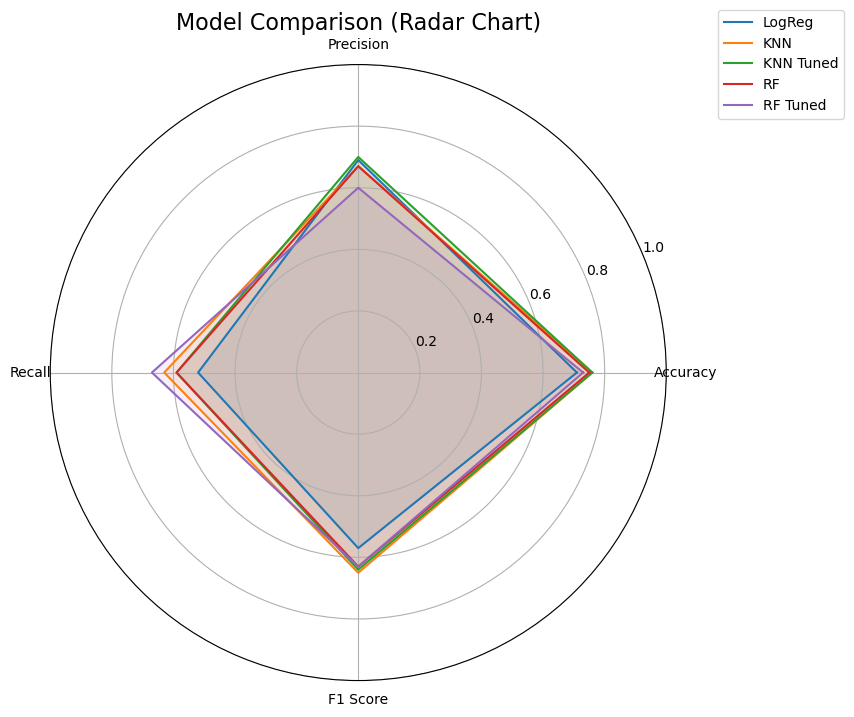

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics and models
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
models = {
    'LogReg': [0.71, 0.69, 0.52, 0.57],
    'KNN': [0.76, 0.67, 0.63, 0.65],
    'KNN Tuned': [0.76, 0.70, 0.59, 0.64],
    'RF': [0.75, 0.67, 0.59, 0.63],
    'RF Tuned': [0.73, 0.60, 0.67, 0.63]
}

# Radar chart setup
labels = metrics
num_vars = len(labels)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Repeat the first point

# Plot each model
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

for name, scores in models.items():
    values = scores + scores[:1]  # Repeat the first score
    ax.plot(angles, values, label=name)
    ax.fill(angles, values, alpha=0.1)

ax.set_title('Model Comparison (Radar Chart)', size=16)
ax.set_ylim(0, 1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))

plt.show()

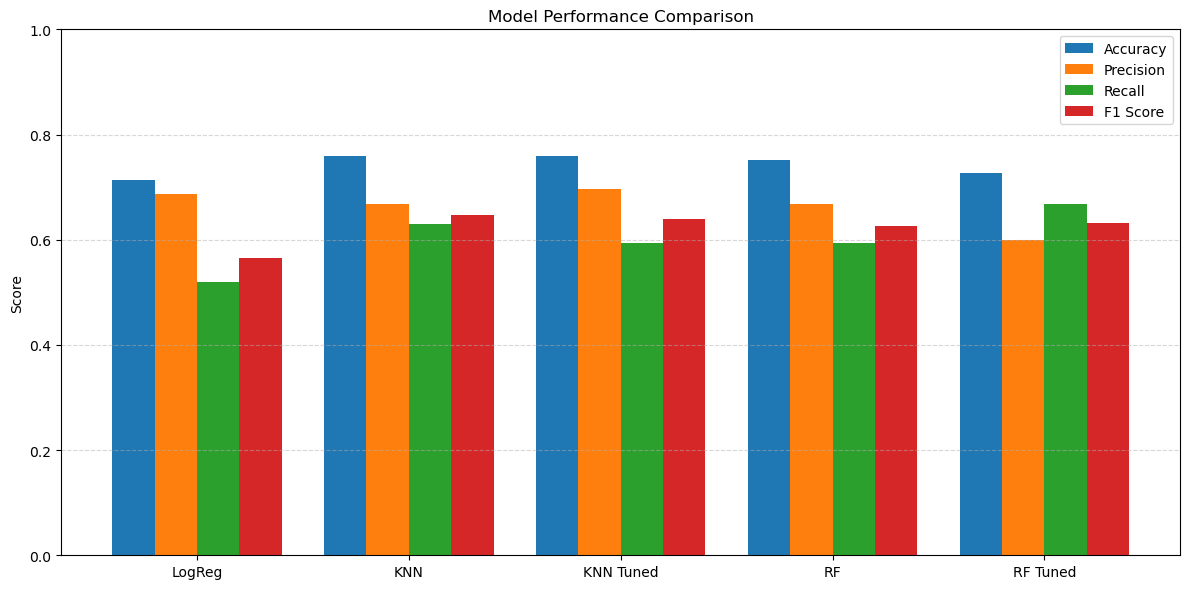

In [30]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['LogReg', 'KNN', 'KNN Tuned', 'RF', 'RF Tuned']
accuracy = [0.714, 0.759, 0.760, 0.752, 0.727]
precision = [0.687, 0.667, 0.696, 0.667, 0.600]
recall = [0.519, 0.630, 0.593, 0.593, 0.667]
f1 = [0.566, 0.647, 0.640, 0.627, 0.632]

# Bar width
bar_width = 0.2
x = np.arange(len(models))

# Plot
plt.figure(figsize=(12, 6))
plt.bar(x - 1.5*bar_width, accuracy, width=bar_width, label='Accuracy')
plt.bar(x - 0.5*bar_width, precision, width=bar_width, label='Precision')
plt.bar(x + 0.5*bar_width, recall, width=bar_width, label='Recall')
plt.bar(x + 1.5*bar_width, f1, width=bar_width, label='F1 Score')

# Labels & Title
plt.xticks(x, models)
plt.ylim(0, 1)
plt.title('Model Performance Comparison')
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)

# Show
plt.tight_layout()
plt.show()

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
def plot_rf_metrics():
    data = {
        'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
        'RF (Default)': [75.2, 66.7, 59.3, 62.7],
        'RF (Tuned)': [72.7, 60.0, 66.7, 63.1]
    }
    df = pd.DataFrame(data)
    df.set_index('Metric', inplace=True)
    ax = df.plot(kind='bar', figsize=(10, 6))
    plt.title('Random Forest: Default vs Tuned Performance')
    plt.ylabel('Percentage')
    plt.ylim(0, 100)
    plt.xticks(rotation=0)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.legend(title='Model')
    plt.tight_layout()
    plt.show()